# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [103]:
import_path ='/Volumes/Expansion/datasets/Maastricht_Epilepsy_DBS_ANT/derivatives/sub-*/connectivity'
file_target= 'sub*-t_conn.nii.gz'

In [104]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target, subject_pattern='sub-')
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Volumes/Expansion/datasets/Maastricht_Epilepsy_DBS_ANT/derivatives/sub-*/connectivity/sub*-t_conn.nii.gz


,sub-antdbsumaastrichtuvta2u01u/connectivity/sub-antdbsumaastrichtuvta2u01u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u02u/connectivity/sub-antdbsumaastrichtuvta2u02u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u03u/connectivity/sub-antdbsumaastrichtuvta2u03u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u04u/connectivity/sub-antdbsumaastrichtuvta2u04u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u05u/connectivity/sub-antdbsumaastrichtuvta2u05u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u06u/connectivity/sub-antdbsumaastrichtuvta2u06u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u07u/connectivity/sub-antdbsumaastrichtuvta2u07u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u08u/connectivity/sub-antdbsumaastrichtuvta2u08u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u09u/connectivity/sub-antdbsumaastrichtuvta2u09u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u10u/connectivity/sub-antdbsumaastrichtuvta2u10u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,...,sub-antdbsumaastrichtuvta2u21u/connectivity/sub-antdbsumaastrichtuvta2u21u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u22u/connectivity/sub-antdbsumaastrichtuvta2u22u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u23u/connectivity/sub-antdbsumaastrichtuvta2u23u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u24u/connectivity/sub-antdbsumaastrichtuvta2u24u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u25u/connectivity/sub-antdbsumaastrichtuvta2u25u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u26u/connectivity/sub-antdbsumaastrichtuvta2u26u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u27u/connectivity/sub-antdbsumaastrichtuvta2u27u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u28u/connectivity/sub-antdbsumaastrichtuvta2u28u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u29u/connectivity/sub-antdbsumaastrichtuvta2u29u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz,sub-antdbsumaastrichtuvta2u30u/connectivity/sub-antdbsumaastrichtuvta2u30u_tome-GSP1000uMF_space-2mm_stat-t_conn.nii.gz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [105]:
pre = 'sub-'
post = '/conn'

In [106]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,antdbsumaastrichtuvta2u01u,antdbsumaastrichtuvta2u02u,antdbsumaastrichtuvta2u03u,antdbsumaastrichtuvta2u04u,antdbsumaastrichtuvta2u05u,antdbsumaastrichtuvta2u06u,antdbsumaastrichtuvta2u07u,antdbsumaastrichtuvta2u08u,antdbsumaastrichtuvta2u09u,antdbsumaastrichtuvta2u10u,...,antdbsumaastrichtuvta2u21u,antdbsumaastrichtuvta2u22u,antdbsumaastrichtuvta2u23u,antdbsumaastrichtuvta2u24u,antdbsumaastrichtuvta2u25u,antdbsumaastrichtuvta2u26u,antdbsumaastrichtuvta2u27u,antdbsumaastrichtuvta2u28u,antdbsumaastrichtuvta2u29u,antdbsumaastrichtuvta2u30u
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates

**The CSV is expected to be in this format**
- sub column contents MUST match the names of the neuroimaging files above. 
    - ID column 
```
+-----+----------------------------+--------------+--------------+--------------+
| sub | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [107]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Volumes/Expansion/datasets/Maastricht_Epilepsy_DBS_ANT/metadata/master_list.csv'
sheet= None #'master_list_proper_subjects'

In [108]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/testing'

In [109]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,Dataset,Subject,fup_time,baseline_q15_memoryScore,final_q15_memoryScore,q_15_improve,baseline_q26_memoryScore,final_q26_memoryScore,q26_improved,orig_roi_vol,...,avgR,t,baseline_q15_memoryScore_1,final_q15_memoryScore_1,chg_q15_memoryScore1,fup_time_q15_memoryScore1,baseline_q26_memoryDifficulties2,final_q26_memoryDifficulties2,chg_q26_memoryDifficulties2_V2,chg_q26_memoryDifficulties2
0,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u10u,fup6,3.0,2,-1.0,2.0,5,-3,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,3.0,2,-1,fup6,2.0,5,3.0,fup6
1,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u11u,fup6,4.0,3,-1.0,2.0,3,-1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,4.0,3,-1,fup6,2.0,3,1.0,fup6
2,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u12u,fup6,4.0,3,-1.0,1.0,4,-3,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,4.0,3,-1,fup6,1.0,4,3.0,fup6
3,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u13u,fup6,1.0,3,2.0,4.0,3,1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,1.0,3,2,fup6,4.0,3,-1.0,fup6
4,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u14u,fup5,4.0,2,-2.0,4.0,2,2,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,4.0,2,-2,fup5,4.0,2,-2.0,fup5
5,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u15u,fup6,2.0,1,-1.0,4.0,5,-1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,2.0,1,-1,fup6,4.0,5,1.0,fup6
6,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u16u,fup6,3.0,2,-1.0,2.0,3,-1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,3.0,2,-1,fup6,2.0,3,1.0,fup6
7,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u17u,fup6,2.0,2,0.0,2.0,4,-2,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,2.0,2,0,fup6,2.0,4,2.0,fup6
8,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u18u,fup6,1.0,3,2.0,3.0,2,1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,1.0,3,2,fup6,3.0,2,-1.0,fup6
9,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u19u,fup6,4.0,4,0.0,1.0,1,0,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,4.0,4,0,fup6,1.0,1,0.0,fup6


**Preprocess Your Data**

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [110]:
data_df.columns

Index(['Dataset', 'Subject', 'fup_time', 'baseline_q15_memoryScore',
       'final_q15_memoryScore', 'q_15_improve', 'baseline_q26_memoryScore',
       'final_q26_memoryScore', 'q26_improved', 'orig_roi_vol', 'roi_2mm',
       'avgRFz', 'avgR', 't', 'baseline_q15_memoryScore_1',
       'final_q15_memoryScore_1', 'chg_q15_memoryScore1',
       'fup_time_q15_memoryScore1', 'baseline_q26_memoryDifficulties2',
       'final_q26_memoryDifficulties2', 'chg_q26_memoryDifficulties2_V2',
       'chg_q26_memoryDifficulties2'],
      dtype='object')

In [111]:
drop_list = ['Subject', 'q_15_improve']

In [112]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,Dataset,Subject,fup_time,baseline_q15_memoryScore,final_q15_memoryScore,q_15_improve,baseline_q26_memoryScore,final_q26_memoryScore,q26_improved,orig_roi_vol,...,avgR,t,baseline_q15_memoryScore_1,final_q15_memoryScore_1,chg_q15_memoryScore1,fup_time_q15_memoryScore1,baseline_q26_memoryDifficulties2,final_q26_memoryDifficulties2,chg_q26_memoryDifficulties2_V2,chg_q26_memoryDifficulties2
0,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u10u,fup6,3.0,2,-1.0,2.0,5,-3,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,3.0,2,-1,fup6,2.0,5,3.0,fup6
1,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u11u,fup6,4.0,3,-1.0,2.0,3,-1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,4.0,3,-1,fup6,2.0,3,1.0,fup6
2,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u12u,fup6,4.0,3,-1.0,1.0,4,-3,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,4.0,3,-1,fup6,1.0,4,3.0,fup6
3,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u13u,fup6,1.0,3,2.0,4.0,3,1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,1.0,3,2,fup6,4.0,3,-1.0,fup6
4,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u14u,fup5,4.0,2,-2.0,4.0,2,2,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,4.0,2,-2,fup5,4.0,2,-2.0,fup5
5,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u15u,fup6,2.0,1,-1.0,4.0,5,-1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,2.0,1,-1,fup6,4.0,5,1.0,fup6
6,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u16u,fup6,3.0,2,-1.0,2.0,3,-1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,3.0,2,-1,fup6,2.0,3,1.0,fup6
7,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u17u,fup6,2.0,2,0.0,2.0,4,-2,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,2.0,2,0,fup6,2.0,4,2.0,fup6
8,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u18u,fup6,1.0,3,2.0,3.0,2,1,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,1.0,3,2,fup6,3.0,2,-1.0,fup6
9,maastrict_GSP100mf_V6,antdbsumaastrichtuvta2u19u,fup6,4.0,4,0.0,1.0,1,0,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,/data/nimlab/dl_archive/maastrict_GSP100mf_V6/...,4.0,4,0,fup6,1.0,1,0.0,fup6


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [113]:
# column = 'City'  # The column you'd like to evaluate
# condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
# value = 'Toronto' # The value to compare against

In [114]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# data_df

In [115]:
# data_df['subject'] = data_df['subject'].str[4:]
# data_df

Regress out a Covariate

In [116]:
data_df.columns

Index(['Dataset', 'Subject', 'fup_time', 'baseline_q15_memoryScore',
       'final_q15_memoryScore', 'q_15_improve', 'baseline_q26_memoryScore',
       'final_q26_memoryScore', 'q26_improved', 'orig_roi_vol', 'roi_2mm',
       'avgRFz', 'avgR', 't', 'baseline_q15_memoryScore_1',
       'final_q15_memoryScore_1', 'chg_q15_memoryScore1',
       'fup_time_q15_memoryScore1', 'baseline_q26_memoryDifficulties2',
       'final_q26_memoryDifficulties2', 'chg_q26_memoryDifficulties2_V2',
       'chg_q26_memoryDifficulties2'],
      dtype='object')

In [117]:
nimg_df.columns

Index(['antdbsumaastrichtuvta2u01u', 'antdbsumaastrichtuvta2u02u',
       'antdbsumaastrichtuvta2u03u', 'antdbsumaastrichtuvta2u04u',
       'antdbsumaastrichtuvta2u05u', 'antdbsumaastrichtuvta2u06u',
       'antdbsumaastrichtuvta2u07u', 'antdbsumaastrichtuvta2u08u',
       'antdbsumaastrichtuvta2u09u', 'antdbsumaastrichtuvta2u10u',
       'antdbsumaastrichtuvta2u11u', 'antdbsumaastrichtuvta2u12u',
       'antdbsumaastrichtuvta2u13u', 'antdbsumaastrichtuvta2u14u',
       'antdbsumaastrichtuvta2u15u', 'antdbsumaastrichtuvta2u16u',
       'antdbsumaastrichtuvta2u17u', 'antdbsumaastrichtuvta2u18u',
       'antdbsumaastrichtuvta2u19u', 'antdbsumaastrichtuvta2u20u',
       'antdbsumaastrichtuvta2u21u', 'antdbsumaastrichtuvta2u22u',
       'antdbsumaastrichtuvta2u23u', 'antdbsumaastrichtuvta2u24u',
       'antdbsumaastrichtuvta2u25u', 'antdbsumaastrichtuvta2u26u',
       'antdbsumaastrichtuvta2u27u', 'antdbsumaastrichtuvta2u28u',
       'antdbsumaastrichtuvta2u29u', 'antdbsumaastrichtuvta2u3

Regress values out of a Clinical Variable

In [118]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list = ['Age']
# regressors = ['DIAGNOSIS_CURRENT']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Regress Values of out the Neuroimaging Variable

In [119]:
# pending

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [120]:
# # Remove anything you don't want to standardize
# cols_not_to_standardize = ['Age',  'Subiculum_Connectivity_T']

In [121]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

Choose Rows to Keep

In [122]:
print(data_df.columns)

Index(['Dataset', 'Subject', 'fup_time', 'baseline_q15_memoryScore',
       'final_q15_memoryScore', 'q_15_improve', 'baseline_q26_memoryScore',
       'final_q26_memoryScore', 'q26_improved', 'orig_roi_vol', 'roi_2mm',
       'avgRFz', 'avgR', 't', 'baseline_q15_memoryScore_1',
       'final_q15_memoryScore_1', 'chg_q15_memoryScore1',
       'fup_time_q15_memoryScore1', 'baseline_q26_memoryDifficulties2',
       'final_q26_memoryDifficulties2', 'chg_q26_memoryDifficulties2_V2',
       'chg_q26_memoryDifficulties2'],
      dtype='object')


In [123]:
subcol = 'Subject'

In [124]:
col_to_keep_list = [subcol, 'q_15_improve']

- The final DF is EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- There should only be 1 variable  the row

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Indep. Var.    | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |

In [125]:
data_df=data_df.loc[:, col_to_keep_list]
data_df = data_df.T
data_df.columns = data_df.loc[subcol]
data_df = data_df.drop(subcol)
data_df.dropna(inplace=True, axis=1)
data_df

Subject,antdbsumaastrichtuvta2u10u,antdbsumaastrichtuvta2u11u,antdbsumaastrichtuvta2u12u,antdbsumaastrichtuvta2u13u,antdbsumaastrichtuvta2u14u,antdbsumaastrichtuvta2u15u,antdbsumaastrichtuvta2u16u,antdbsumaastrichtuvta2u17u,antdbsumaastrichtuvta2u18u,antdbsumaastrichtuvta2u19u,...,antdbsumaastrichtuvta2u24u,antdbsumaastrichtuvta2u25u,antdbsumaastrichtuvta2u2u,antdbsumaastrichtuvta2u3u,antdbsumaastrichtuvta2u4u,antdbsumaastrichtuvta2u5u,antdbsumaastrichtuvta2u6u,antdbsumaastrichtuvta2u7u,antdbsumaastrichtuvta2u8u,antdbsumaastrichtuvta2u9u
q_15_improve,-1.0,-1.0,-1.0,2.0,-2.0,-1.0,-1.0,0.0,2.0,0.0,...,-1.0,0.0,-2.0,0.0,0.0,1.0,1.0,-1.0,-1.0,1.0


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [126]:
mask_path = '/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Correlation method
- spearman or pearson

In [127]:
method = 'pearson'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [128]:
max_stat_method = 'pseudo_var_smooth'

In [129]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                          variable_dataframe=data_df, 
                          mask_threshold=mask_threshold, 
                          mask_path=mask_path, out_dir=out_dir, 
                          method=method, max_stat_method=max_stat_method, vectorize=True)

calvin_fwe.permutation_test_r_map(n_permutations=10, debug=False)

Permuting: 100%|██████████| 10/10 [00:00<00:00, 56.08it/s]


95th percentile of permuted statistic:  0.7891110196790493
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/testing
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/testing
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/testing


Visualize the FWE Corrected Image


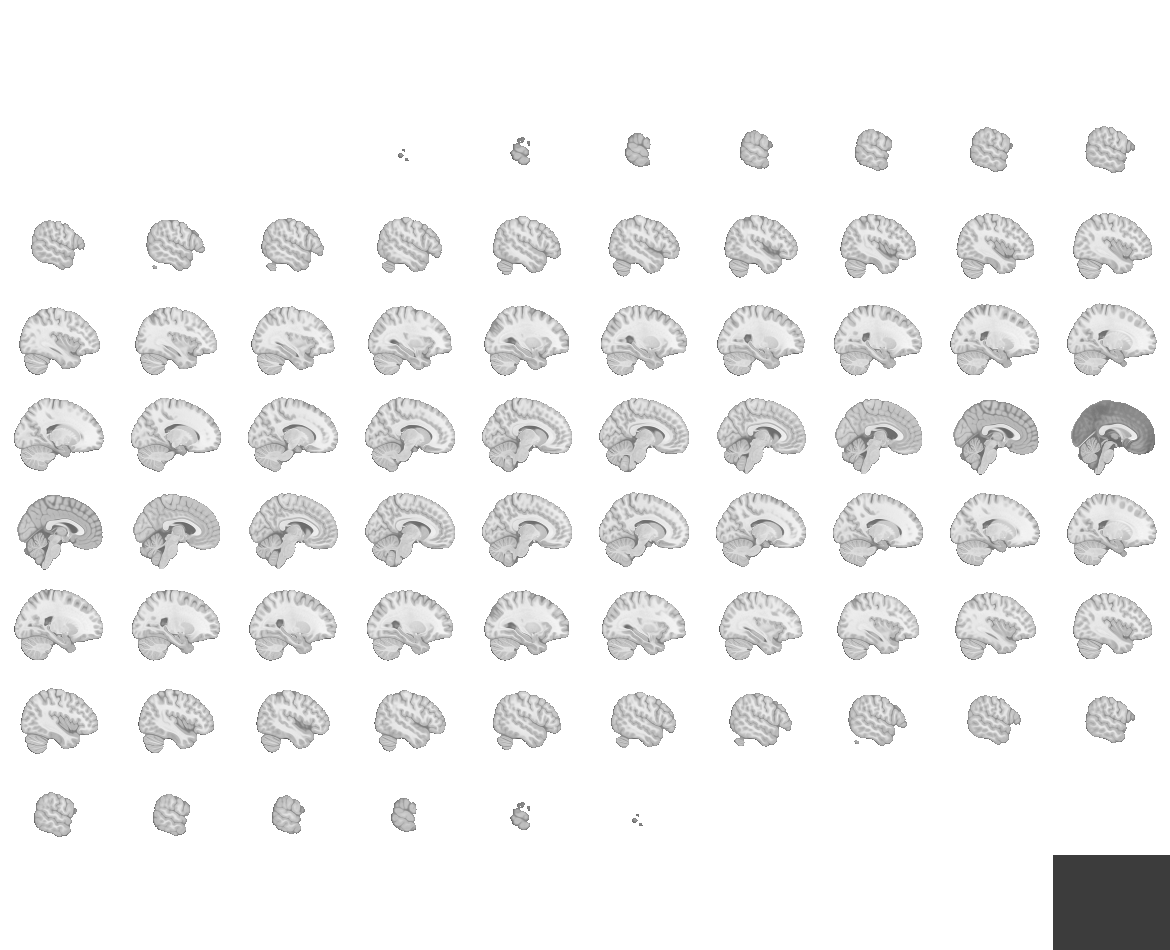
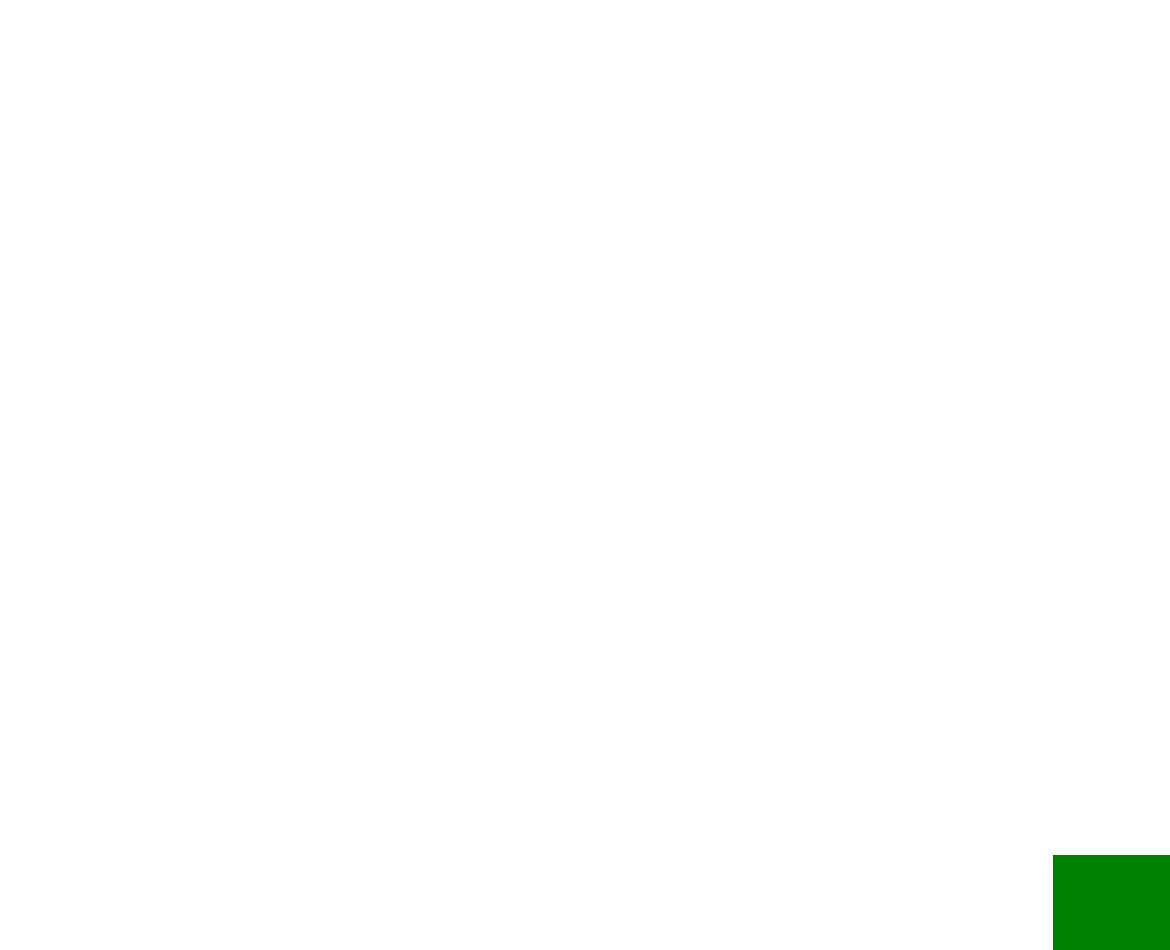

In [130]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


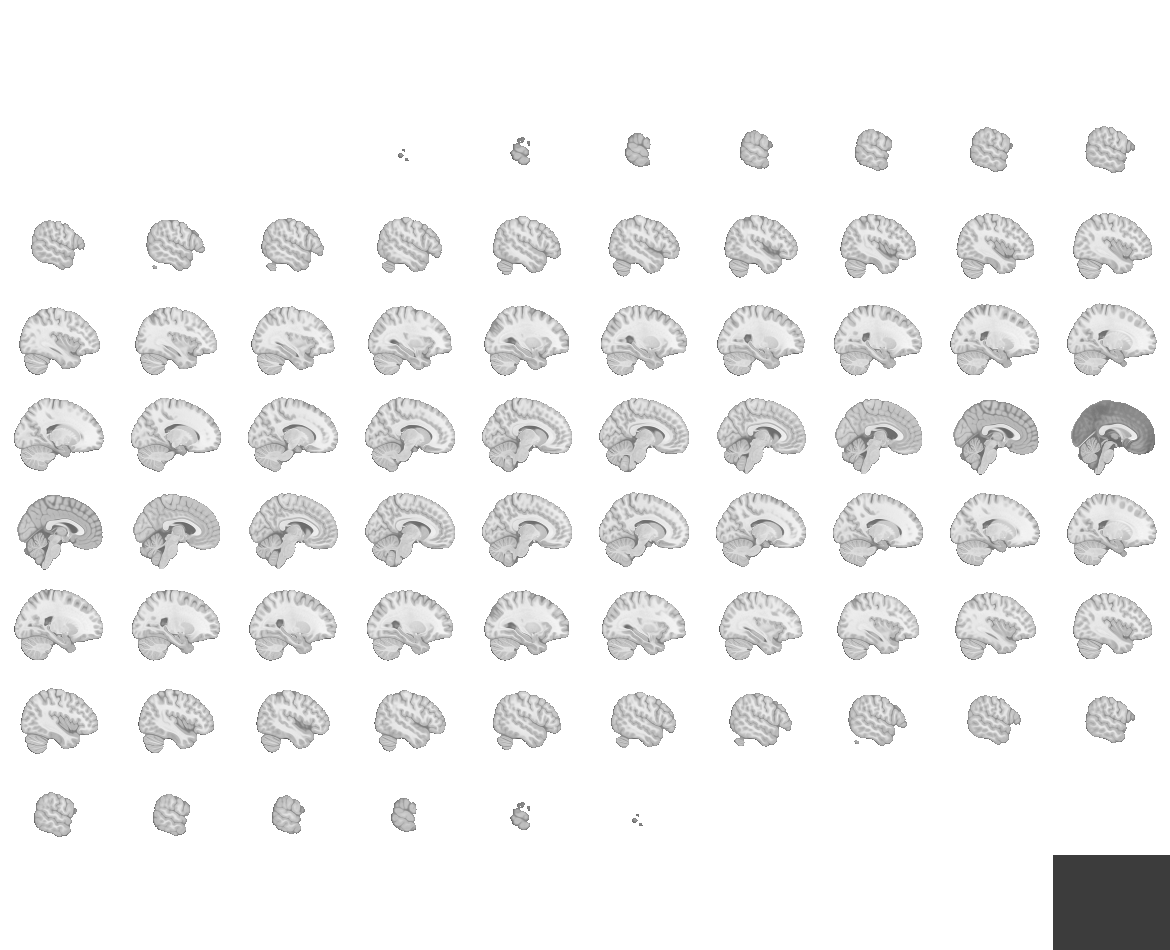
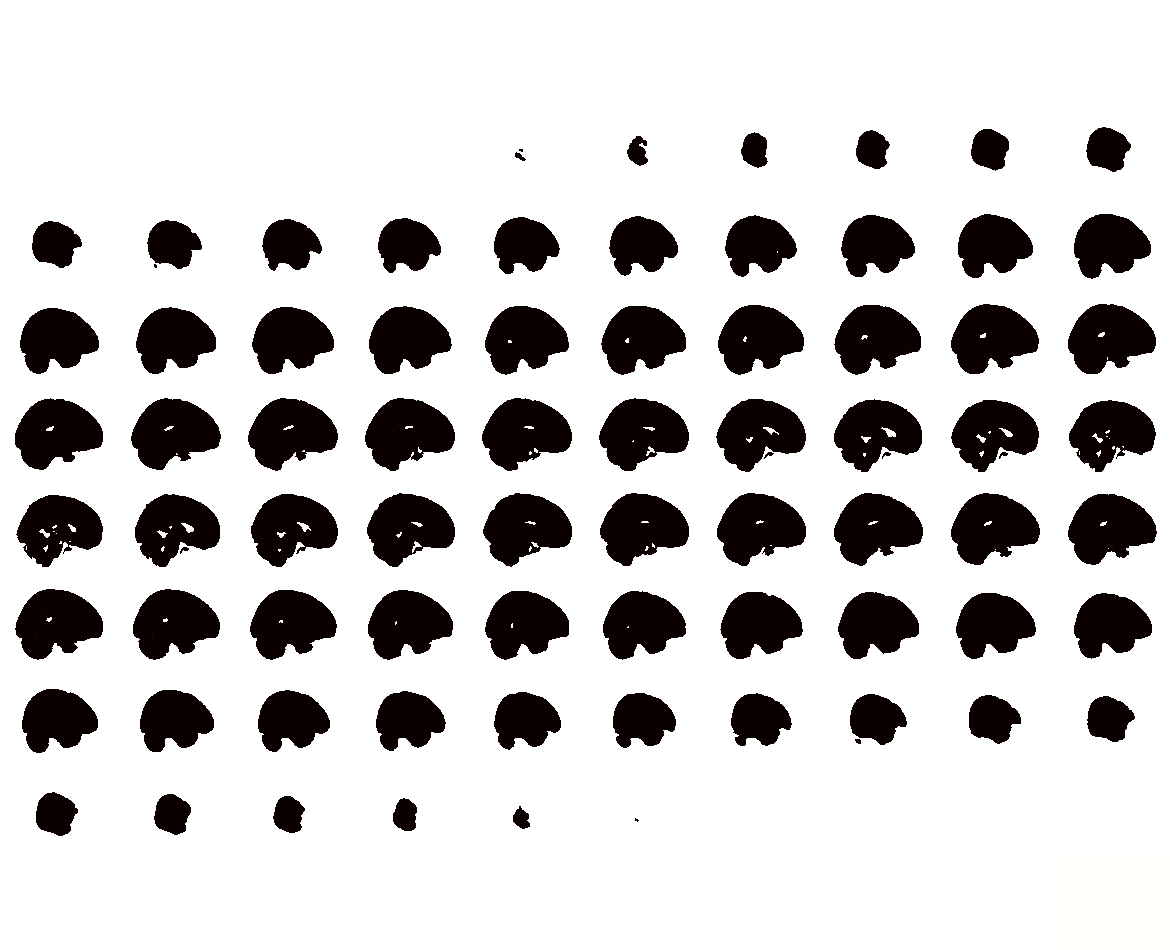

In [131]:
calvin_fwe.p_img

Visualize the Uncorrected Image


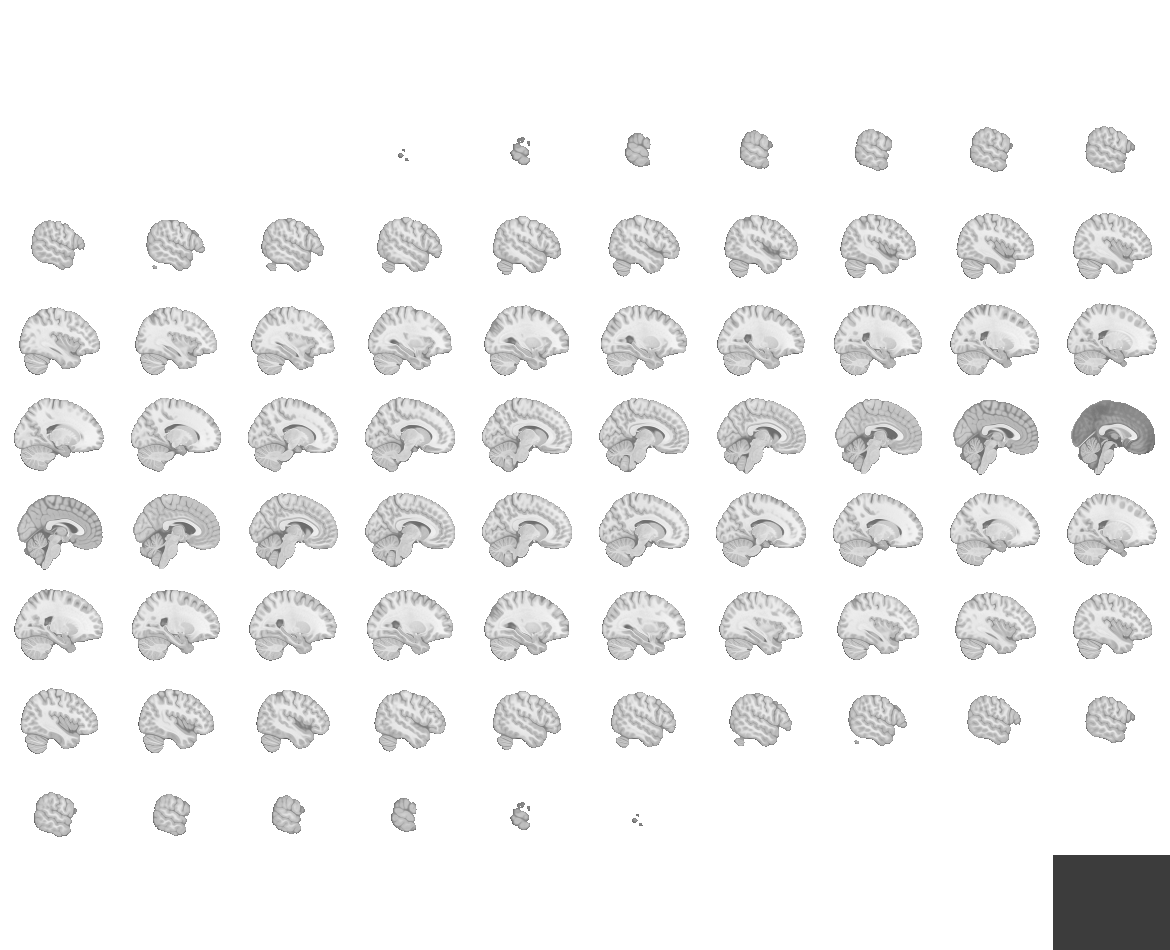
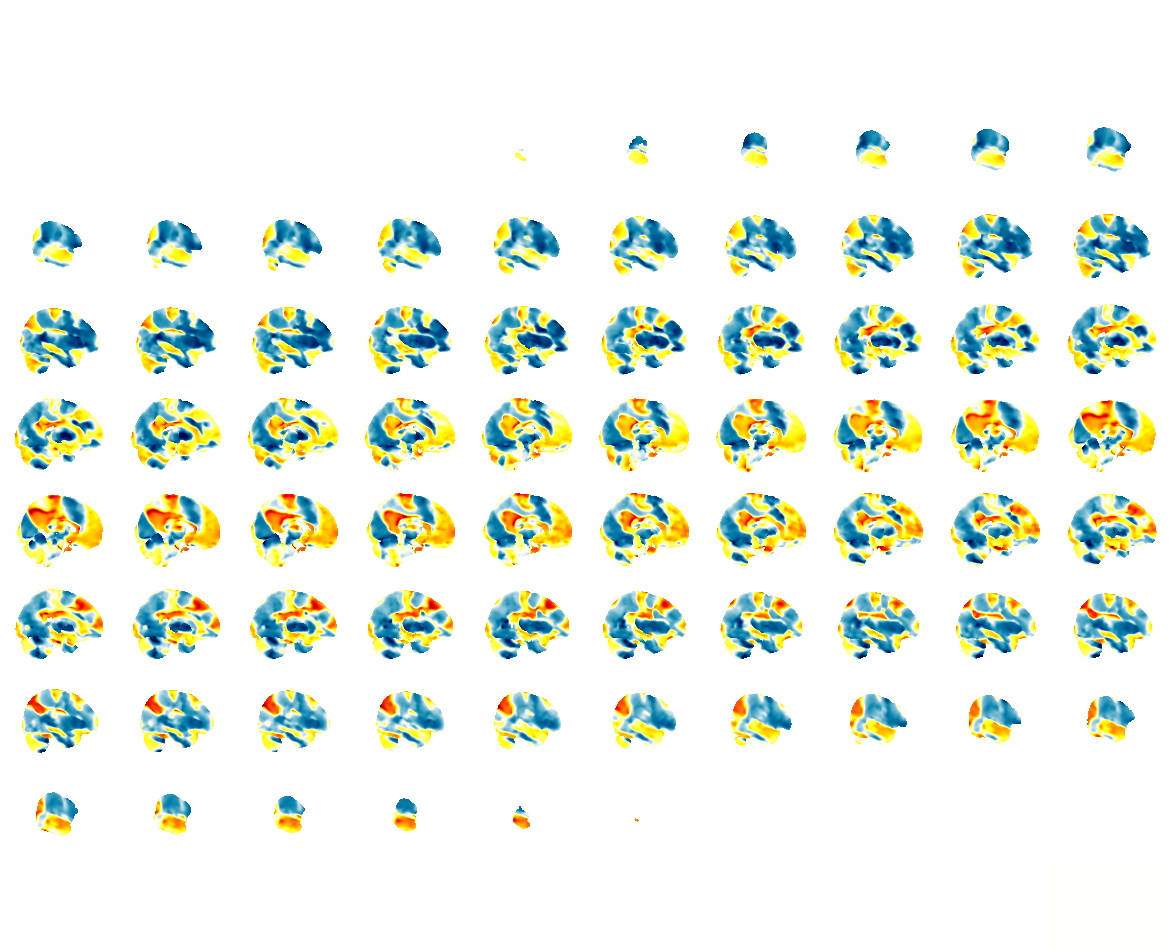

In [132]:
calvin_fwe.uncorrected_img